<a href="https://colab.research.google.com/github/faridachettih/datascientest/blob/main/Exams/Exam02%20-%20Youtube%20videos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chargement du Dataset

In [25]:
import pandas as pd

fileURL = "https://raw.githubusercontent.com/faridachettih/datascientest/main/Exams/data/youtube.csv"

# Charger sans index_col d'abord
df = pd.read_csv(fileURL, sep=',', on_bad_lines='skip')

# Afficher les premières lignes
df.head()

,index,video_id,trending_date,title,channel_title,category_id,publish_date,time_frame,published_day_of_week,publish_country,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,13/11/2017,17:00 to 17:59,Monday,US,SHANtell martin,748374,57527,2966,15954,False,False,False
1,1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,13/11/2017,7:00 to 7:59,Monday,US,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False
2,2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,12/11/2017,19:00 to 19:59,Sunday,US,"racist superman|""rudy""""|""""mancuso""""|""""king""""|""...",3191434,146033,5339,8181,False,False,False
3,3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,13/11/2017,11:00 to 11:59,Monday,US,"rhett and link|""gmm""""|""""good mythical morning""...",343168,10172,666,2146,False,False,False
4,4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,12/11/2017,18:00 to 18:59,Sunday,US,"ryan|""higa""""|""""higatv""""|""""nigahiga""""|""""i dare ...",2095731,132235,1989,17518,False,False,False


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161470 entries, 0 to 161469
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   index                   161470 non-null  int64 
 1   video_id                161470 non-null  object
 2   trending_date           161470 non-null  object
 3   title                   161470 non-null  object
 4   channel_title           161470 non-null  object
 5   category_id             161470 non-null  int64 
 6   publish_date            161470 non-null  object
 7   time_frame              161470 non-null  object
 8   published_day_of_week   161470 non-null  object
 9   publish_country         161470 non-null  object
 10  tags                    161470 non-null  object
 11  views                   161470 non-null  int64 
 12  likes                   161470 non-null  int64 
 13  dislikes                161470 non-null  int64 
 14  comment_count           161470 non-n

In [27]:
# Sélectionner et renommer les colonnes nécessaires
df = df[[
    'video_id',
    'title',
    'publish_date',
    'channel_title',
    'category_id',
    'views',
    'likes',
    'dislikes',
    'comment_count',
    'comments_disabled'
]].copy()

# Renommer les colonnes pour correspondre à la structure attendue
df = df.rename(columns={
    'publish_date': 'publishedAt',
    'channel_title': 'channelTitle',
    'category_id': 'categoryId',
    'views': 'view_count'
})

# Debut Exams

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161470 entries, 0 to 161469
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           161470 non-null  object
 1   title              161470 non-null  object
 2   publishedAt        161470 non-null  object
 3   channelTitle       161470 non-null  object
 4   categoryId         161470 non-null  int64 
 5   view_count         161470 non-null  int64 
 6   likes              161470 non-null  int64 
 7   dislikes           161470 non-null  int64 
 8   comment_count      161470 non-null  int64 
 9   comments_disabled  161470 non-null  bool  
dtypes: bool(1), int64(5), object(4)
memory usage: 11.2+ MB


In [29]:
# (h) Afficher le type de chaque colonne et le changer s'il y a des variables
# qui ne sont pas dans un format adapté.
df["publishedAt"] = pd.to_datetime(df["publishedAt"])
df.dtypes

/tmp/ipython-input-3637557837.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["publishedAt"] = pd.to_datetime(df["publishedAt"])


,0
video_id,object
title,object
publishedAt,datetime64[ns]
channelTitle,object
categoryId,int64
view_count,int64
likes,int64
dislikes,int64
comment_count,int64
comments_disabled,bool


In [30]:
# (i) Afficher le différentes modalités de la colonne "categoryId", ainsi que leur fréquence.

df['categoryId'].value_counts()

,count
categoryId,
24,42358
10,27903
22,15960
23,13401
25,11623
17,11210
26,10442
1,9139
20,5408


In [31]:
# (j) Créer un nouveau dataframe nommé df_filtre à partir de df en gardant uniquement les
# catégories Entertainment, Music, Gaming et Education. Afficher les (5) premières lignes.

df_filtre = df[df['categoryId'].isin([24, 10, 20, 27])]
df_filtre.head(5)

,video_id,title,publishedAt,channelTitle,categoryId,view_count,likes,dislikes,comment_count,comments_disabled
1,1ZAPwfrtAFY,The Trump Presidency: Last Week Tonight with J...,2017-11-13,LastWeekTonight,24,2418783,97185,6146,12703,False
3,puqaWrEC7tY,Nickelback Lyrics: Real or Fake?,2017-11-13,Good Mythical Morning,24,343168,10172,666,2146,False
4,d380meD0W0M,I Dare You: GOING BALD!?,2017-11-12,nigahiga,24,2095731,132235,1989,17518,False
6,39idVpFF7NQ,Roy Moore & Jeff Sessions Cold Open - SNL,2017-11-12,Saturday Night Live,24,2103417,15993,2445,1970,False
11,VifQlJit6A0,(SPOILERS) 'Shiva Saves the Day' Talked About ...,2017-11-13,amc,24,104578,1576,303,1279,False


In [32]:
# (k) Dans ce nouveau dataframe remplacer les nombres présents sur "categoryId" avec le nom de la catégorie correspondante
# changer le type de colonne en chaine de caratères
df_filtre["categoryId"] = df_filtre["categoryId"].astype("string")

#Remplacer les nombres avec le nom
df_filtre.loc[df_filtre['categoryId'] == "24", 'categoryId'] = 'Entertainment'
df_filtre.loc[df_filtre['categoryId'] == "10", 'categoryId'] = 'Music'
df_filtre.loc[df_filtre['categoryId'] == "20", 'categoryId'] = 'Gaming'
df_filtre.loc[df_filtre['categoryId'] == "27", 'categoryId'] = 'Education'

df_filtre



/tmp/ipython-input-3178590266.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtre["categoryId"] = df_filtre["categoryId"].astype("string")


,video_id,title,publishedAt,channelTitle,categoryId,view_count,likes,dislikes,comment_count,comments_disabled
1,1ZAPwfrtAFY,The Trump Presidency: Last Week Tonight with J...,2017-11-13,LastWeekTonight,Entertainment,2418783,97185,6146,12703,False
3,puqaWrEC7tY,Nickelback Lyrics: Real or Fake?,2017-11-13,Good Mythical Morning,Entertainment,343168,10172,666,2146,False
4,d380meD0W0M,I Dare You: GOING BALD!?,2017-11-12,nigahiga,Entertainment,2095731,132235,1989,17518,False
6,39idVpFF7NQ,Roy Moore & Jeff Sessions Cold Open - SNL,2017-11-12,Saturday Night Live,Entertainment,2103417,15993,2445,1970,False
11,VifQlJit6A0,(SPOILERS) 'Shiva Saves the Day' Talked About ...,2017-11-13,amc,Entertainment,104578,1576,303,1279,False
...,...,...,...,...,...,...,...,...,...,...
161464,7E1np354AEc,Ð’ÐµÑ‡ÐµÑ€ Ñ Ð’Ð»Ð°Ð´Ð¸Ð¼Ð¸Ñ€Ð¾Ð¼ Ð¡Ð¾Ð»Ð¾Ð²Ñ...,2018-06-13,Ð Ð¾ÑÑÐ¸Ñ 24,Entertainment,201847,1568,407,537,False
161465,sGolxsMSGfQ,HOW2: How to Solve a Mystery,2018-06-13,Annoying Orange,Entertainment,80685,1701,99,1312,False
161466,8HNuRNi8t70,Eli Lik Lik Episode 13 Partie 01,2018-06-13,Elhiwar Ettounsi,Entertainment,103339,460,66,51,False
161467,GWlKEM3m2EE,KINGDOM HEARTS III â€“ SQUARE ENIX E3 SHOWCASE...,2018-06-11,Kingdom Hearts,Gaming,773347,25900,224,3881,False


/tmp/ipython-input-197723353.py:4: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  groupby_m = df_filtre.groupby([pd.Grouper(key = 'publishedAt', freq = 'm'),


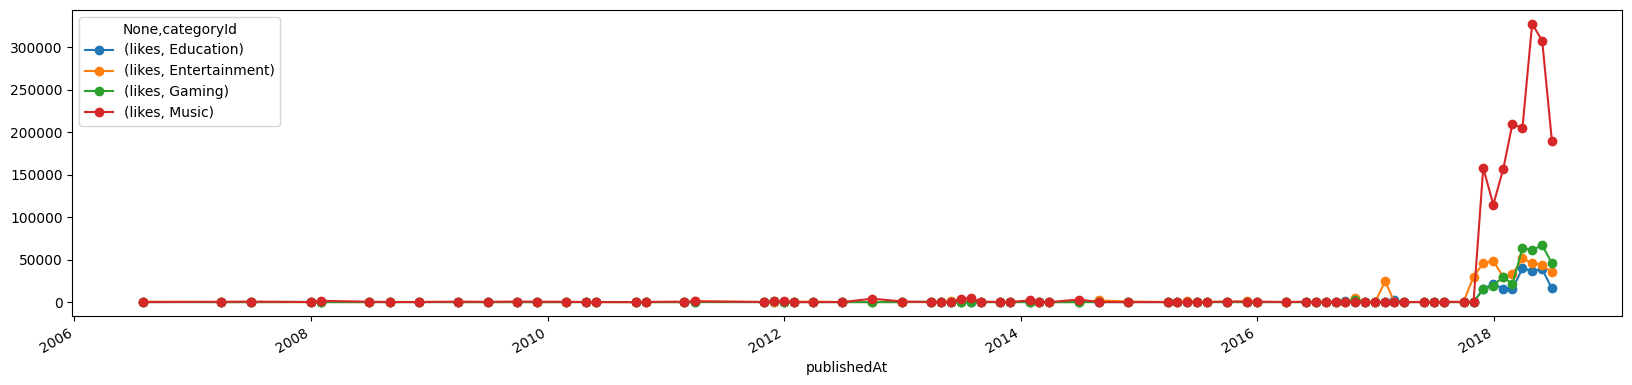

In [33]:
# (l) En regroupant les données, on peut afficher l'évolution du nombre moyen de likes en fonction de la date d'apparition de la vidéo
# (avec une fréquence mensuelle) et en distinguant la catégorie de la vidéo. Exécutez la cellule ci-dessous et commenter le résultat.
#df_filtre["publishedAt"] = pd.to_datetime(df_filtre["publishedAt"])
groupby_m = df_filtre.groupby([pd.Grouper(key = 'publishedAt', freq = 'm'),
                               df_filtre['categoryId']])\
                     .agg({'likes':'mean'}).unstack().fillna(0)

groupby_m.plot(figsize = (20, 4.5), style = 'o-');


On observe des variations dans le temps du nombre moyen de likes selon les catégories.

Certaines catégories ont une moyenne systématiquement plus élevée (courbe au-dessus).

Les pics peuvent venir de vidéos virales dans un mois donné (la moyenne monte fortement).

Si les courbes sont proches → catégories proches en engagement ; si elles sont très séparées → catégories différentes en engagement.



In [34]:
# (m)
# création d'une nouvelle colonne 'month' en obtenant une pandas.Series contenant des objets datetime.date
df_filtre["month"] = pd.to_datetime(df_filtre["publishedAt"]).dt.date
# On applique une fonction à chaque élément de la Series pour récupérer le mois.
df_filtre["month"] = df_filtre["month"].apply(lambda x: x.month)
df_filtre.head()


/tmp/ipython-input-146660362.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtre["month"] = pd.to_datetime(df_filtre["publishedAt"]).dt.date
/tmp/ipython-input-146660362.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtre["month"] = df_filtre["month"].apply(lambda x: x.month)


,video_id,title,publishedAt,channelTitle,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,month
1,1ZAPwfrtAFY,The Trump Presidency: Last Week Tonight with J...,2017-11-13,LastWeekTonight,Entertainment,2418783,97185,6146,12703,False,11
3,puqaWrEC7tY,Nickelback Lyrics: Real or Fake?,2017-11-13,Good Mythical Morning,Entertainment,343168,10172,666,2146,False,11
4,d380meD0W0M,I Dare You: GOING BALD!?,2017-11-12,nigahiga,Entertainment,2095731,132235,1989,17518,False,11
6,39idVpFF7NQ,Roy Moore & Jeff Sessions Cold Open - SNL,2017-11-12,Saturday Night Live,Entertainment,2103417,15993,2445,1970,False,11
11,VifQlJit6A0,(SPOILERS) 'Shiva Saves the Day' Talked About ...,2017-11-13,amc,Entertainment,104578,1576,303,1279,False,11


/tmp/ipython-input-3502006414.py:4: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  categories = df_filtre.groupby([pd.Grouper(key = 'publishedAt', freq = 'm'),


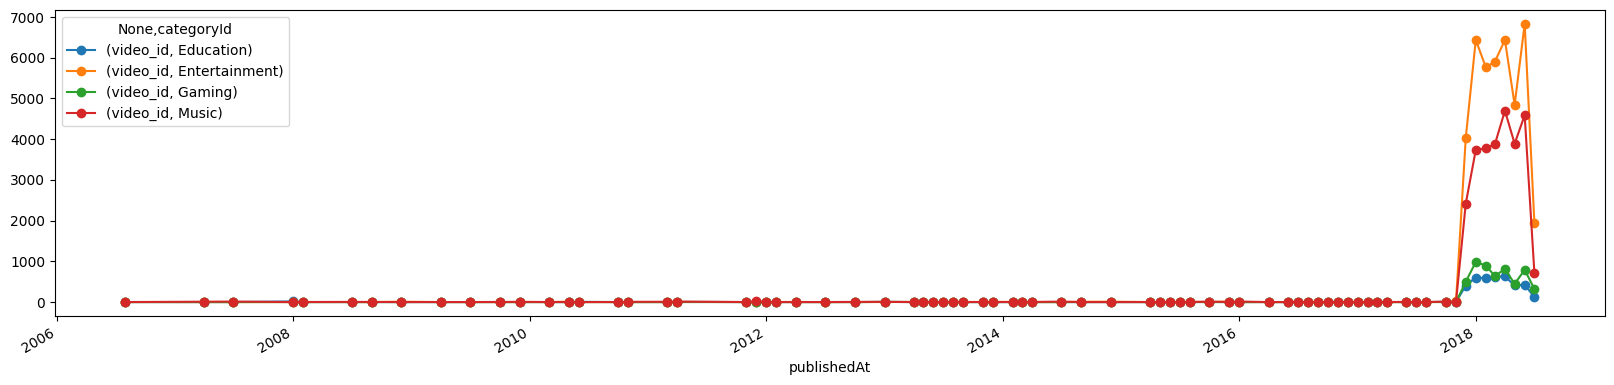

In [35]:
# (n) Grâce au résultat précédent et à la cellule suivante que vous exécuterez, peut-on conclure quant à une hiérarchie
# entre la catégorie et le nombre d'apparitions de la vidéo au fil du temps (en fonction du mois)?

categories = df_filtre.groupby([pd.Grouper(key = 'publishedAt', freq = 'm'),
                                df_filtre['categoryId']])\
                      .agg({'video_id':'count'}).unstack().fillna(0)

categories.plot(figsize = (20, 4.5), style = 'o-');

Le code fourni trace le nombre de vidéos par mois et par catégorie.

Commentaire/conclusion type :

Une hiérarchie existe si une catégorie est presque toujours au-dessus des autres courbes (plus de vidéos publiées chaque mois).

Si les courbes se croisent souvent → hiérarchie pas stable (ça dépend des mois).

Si une catégorie est toujours en bas → c’est la moins fréquente sur la période.

In [ ]:
# (o) Afficher les indicateurs de position et de dispersion (les plus usuels) de la variable "likes" du df.
df['likes'].describe()

,likes
count,1.614700e+05
mean,6.566194e+04
std,2.260617e+05
min,0.000000e+00
25%,1.975000e+03
50%,9.840000e+03
75%,4.006275e+04
max,5.613827e+06


In [37]:
# (p) Trouver la vidéo qui a eu le nombre maximal de likes.
df.loc[df["likes"]==df["likes"].max()]


,video_id,title,publishedAt,channelTitle,categoryId,view_count,likes,dislikes,comment_count,comments_disabled
38273,7C2z4GqqS5E,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MV,2018-05-18,ibighit,10,123010920,5613827,206892,1228655,False
77587,7C2z4GqqS5E,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MV,2018-05-18,ibighit,10,123010920,5613827,206892,1228655,False


In [ ]:
# (q) À partir de df créer un dataframe df_num qui contient uniquement les colonnes avec des données numériques et afficher les (5) premières lignes.
#le dataframe contenant uniquement les variables numériques est créé à l’aide de la fonction select_dtypes
df_num = df.select_dtypes(include='number')
df_num.head(5)

,categoryId,view_count,likes,dislikes,comment_count
0,22,748374,57527,2966,15954
1,24,2418783,97185,6146,12703
2,23,3191434,146033,5339,8181
3,24,343168,10172,666,2146
4,24,2095731,132235,1989,17518


In [ ]:
# (r) Calculer les coefficients de corrélation entre les différentes colonnes.
#on calcule la corrélation de Pearson entre toutes les variables numériques
df_num.corr()

,categoryId,view_count,likes,dislikes,comment_count
categoryId,1.000000,-0.161403,-0.179315,-0.037333,-0.078428
view_count,-0.161403,1.000000,0.786897,0.414189,0.499026
likes,-0.179315,0.786897,1.000000,0.453304,0.776422
dislikes,-0.037333,0.414189,0.453304,1.000000,0.732969
comment_count,-0.078428,0.499026,0.776422,0.732969,1.000000


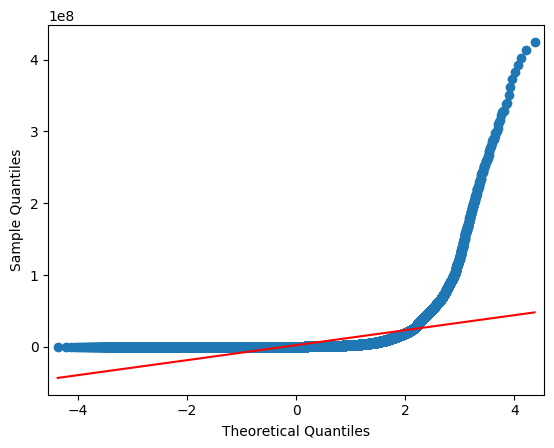

In [ ]:
# (s) Les données présentes dans la variable view_count semblent-elles normales ?
#Nous allons utiliser le QQ-plot de la librairie statsmodels.api pour répondre à notre question
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(df_num["view_count"], line="s")
plt.show()
#Le QQ-plot de la variable view_count, réalisé à l’aide du module statsmodels.api, montre des écarts importants par rapport à la droite théorique d’une loi normale, notamment dans les queues de distribution. On peut donc conclure que la variable view_count ne suit pas une loi normale.



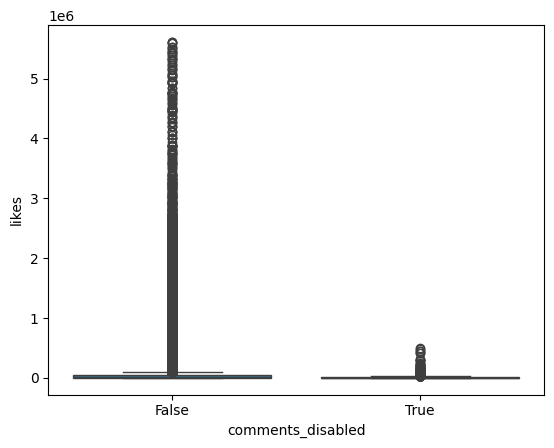

In [ ]:
# (t) On voudrait savoir si le fait de désactiver les commentaires sur youtube a une influence sur les nombre de likes.
# Proposer une démarche scientifique, décrire les étapes et appliquer la méthode spécifique utilisé, puis conclure.

# on sépare en deux group
likes_comments_on = df[df["comments_disabled"] == False]["likes"]
likes_comments_off = df[df["comments_disabled"] == True]["likes"]

#ensuite on compare les statistiques descriptives
likes_comments_on.describe(), likes_comments_off.describe()

# et ensuite on visualise avec boxplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="comments_disabled",y="likes",data=df)
plt.show()
